In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [2]:
#Step 1: Loading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data = df[['Latitude', 'Longitude', 'MedInc']]

data.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [4]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [5]:
#Step 2: Build a K-Means

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_data)

KMeans(n_clusters=6, random_state=42)

In [6]:
df['cluster'] = kmeans.predict(data)

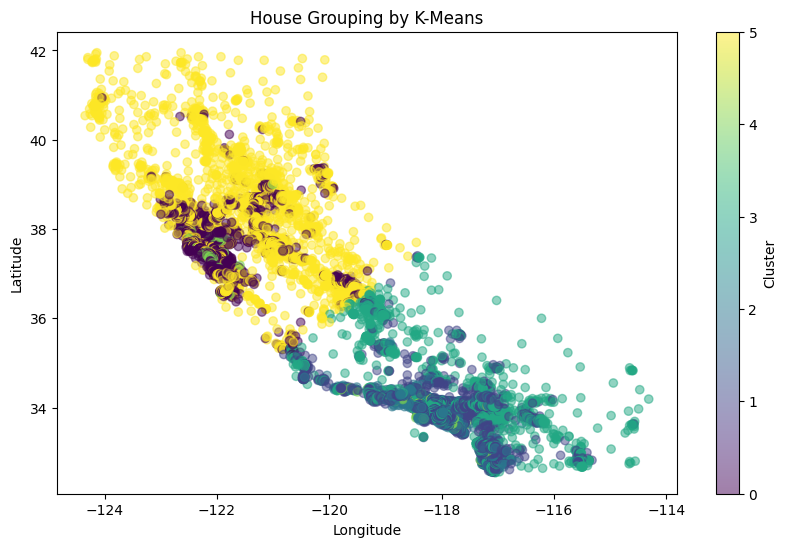

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Grouping by K-Means')
plt.show()

In [8]:
#Step 3: Predict with the test set

test_data['cluster'] = kmeans.predict(test_data)

test_data.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


In [9]:
#Step 4: Train a supervised classification model

X_train, X_test, y_train, y_test = train_test_split(data, df['cluster'], test_size=0.2, random_state=42)
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [10]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Model Accuracy: {accuracy:.2f}')

Classification Model Accuracy: 1.00


 The Random Forest Classifier shows strong accuracy which means that the K-Means clustering provided meaningful groupings.

In [13]:
#Step 5: Save the models

joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(clf, "classification_model.pkl")

['classification_model.pkl']